<a href="https://colab.research.google.com/github/jussste/PTUA7/blob/main/mushr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Identifying Wild Mushrooms: what to forage, what to avoid?


Through classification modeling, this project aims to classify mushrooms as edible or poisonous.

With more and more people interested, foraging for mushrooms in the wild is likely to increase and I wanted to understand if edible/poisonous mushrooms could be easily indentified and what that looks like.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [70]:
import pandas as pd

In [71]:
path = '/content/drive/MyDrive/mushrooms.csv'

In [ ]:
df = pd.read_csv(path)
df.describe


# Importing necessary libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import chi2, RFECV
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, auc, roc_curve, plot_roc_curve
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image


ImportError: ignored


# EDA

**Exploratory Data Analysis** (EDA) was initally performed on the dataset before  encoding was applied to understand categorical distributions of features


*Mushrooms are diverse and come in various shapes, sizes, and colors. Here are some common features of mushrooms:*




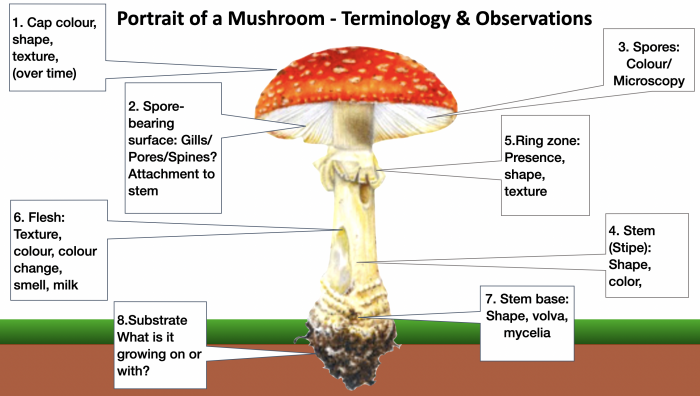

*Exploratory Data Analysis (EDA) was initally performed on the dataset before encoding was applied to understand categorical distributions of features*


Feature value key:

    cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
    cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
    cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
    bruises?: bruises=1,no=0
    odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
    gill-attachment: attached=1,free=0
    gill-spacing: close=0,crowded=1
    gill-size: broad=0,narrow=1
    gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
    stalk-shape: enlarging=0,tapering=1
    stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
    stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    veil-color: brown=n,orange=o,white=w,yellow=y
    ring-number: none=n,one=o,two=t
    ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
    spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
    population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
    habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d







In [48]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Examining the Data

The statistics of the columns can be obtained by using the  .describe()  approach.

The tally represents the quantity of replies.
The unique function displays the count of distinct categories.
The highest categorical value is displayed at the top.
The 'freq' represents the count or frequency of the most commonly occurring categorical value.

In [134]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.161497,0.309207,4.810684,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.368011,0.462195,3.540359,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,0.000000,0.000000,5.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,0.000000,1.000000,7.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,11.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,2.000000,4.000000,8.000000,5.000000,6.000000


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [42]:
df.info() # display basic info about data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [50]:
df.shape  # returns a tuple representing the number of rows and columns in the DataFrame.

(8124, 23)

*Observations:*
there is 8124 observations and 23 columns. (22 Features + 1 Target Variable: "class")

By utilizing the  value_counts()  technique, it is possible to observe that the dataset is well-proportioned.

In [22]:
df['class'].value_counts() # display number of samples on each class

e    4208
p    3916
Name: class, dtype: int64

In [23]:
total_counts = 4208 + 3916
print((4208/total_counts)*100) # class 0 = 'e'
print((3916/total_counts)*100) # class 1 = 'p'

51.7971442639094
48.20285573609059


Observations
The data seems balanced - there is very roughly a 50-50 ratio for both edible and poisonous mushrooms, which indicates our data is balanced.

In [24]:
# check for null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Countplots and Cramer's V Correlation Matrix

A countplots is  used  to display the counts of observations within categories. It's a type of bar plot where the height of each bar represents the number of occurrences of a categorical variable.Countplot provides a quick summary of the distribution of data. This visual representation allows for easy comprehension of how frequently each category appears in the dataset.Countplots enable easy comparison between different categories, making it straightforward to observe disparities or patterns among them.

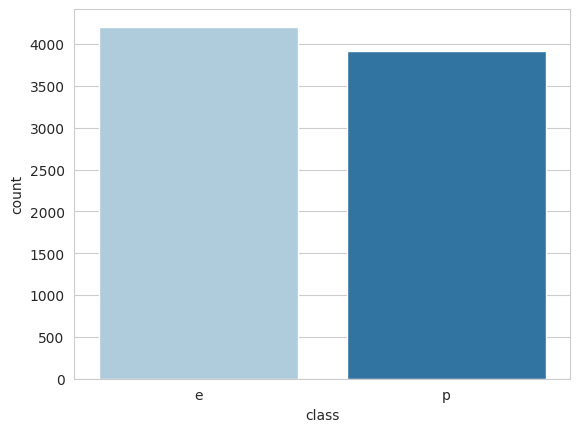

In [52]:
sns.countplot(data=df, x='class')
plt.show()

*Observations: the class frequency of the target variable is relatively balanced. The number of edible and non-edible mushrooms is similar.*:


Multiple countplots aims to display a grid of countplots for each column in the dataset. The countplot displays the count of each category in the column, ordered by their counts in ascending order.

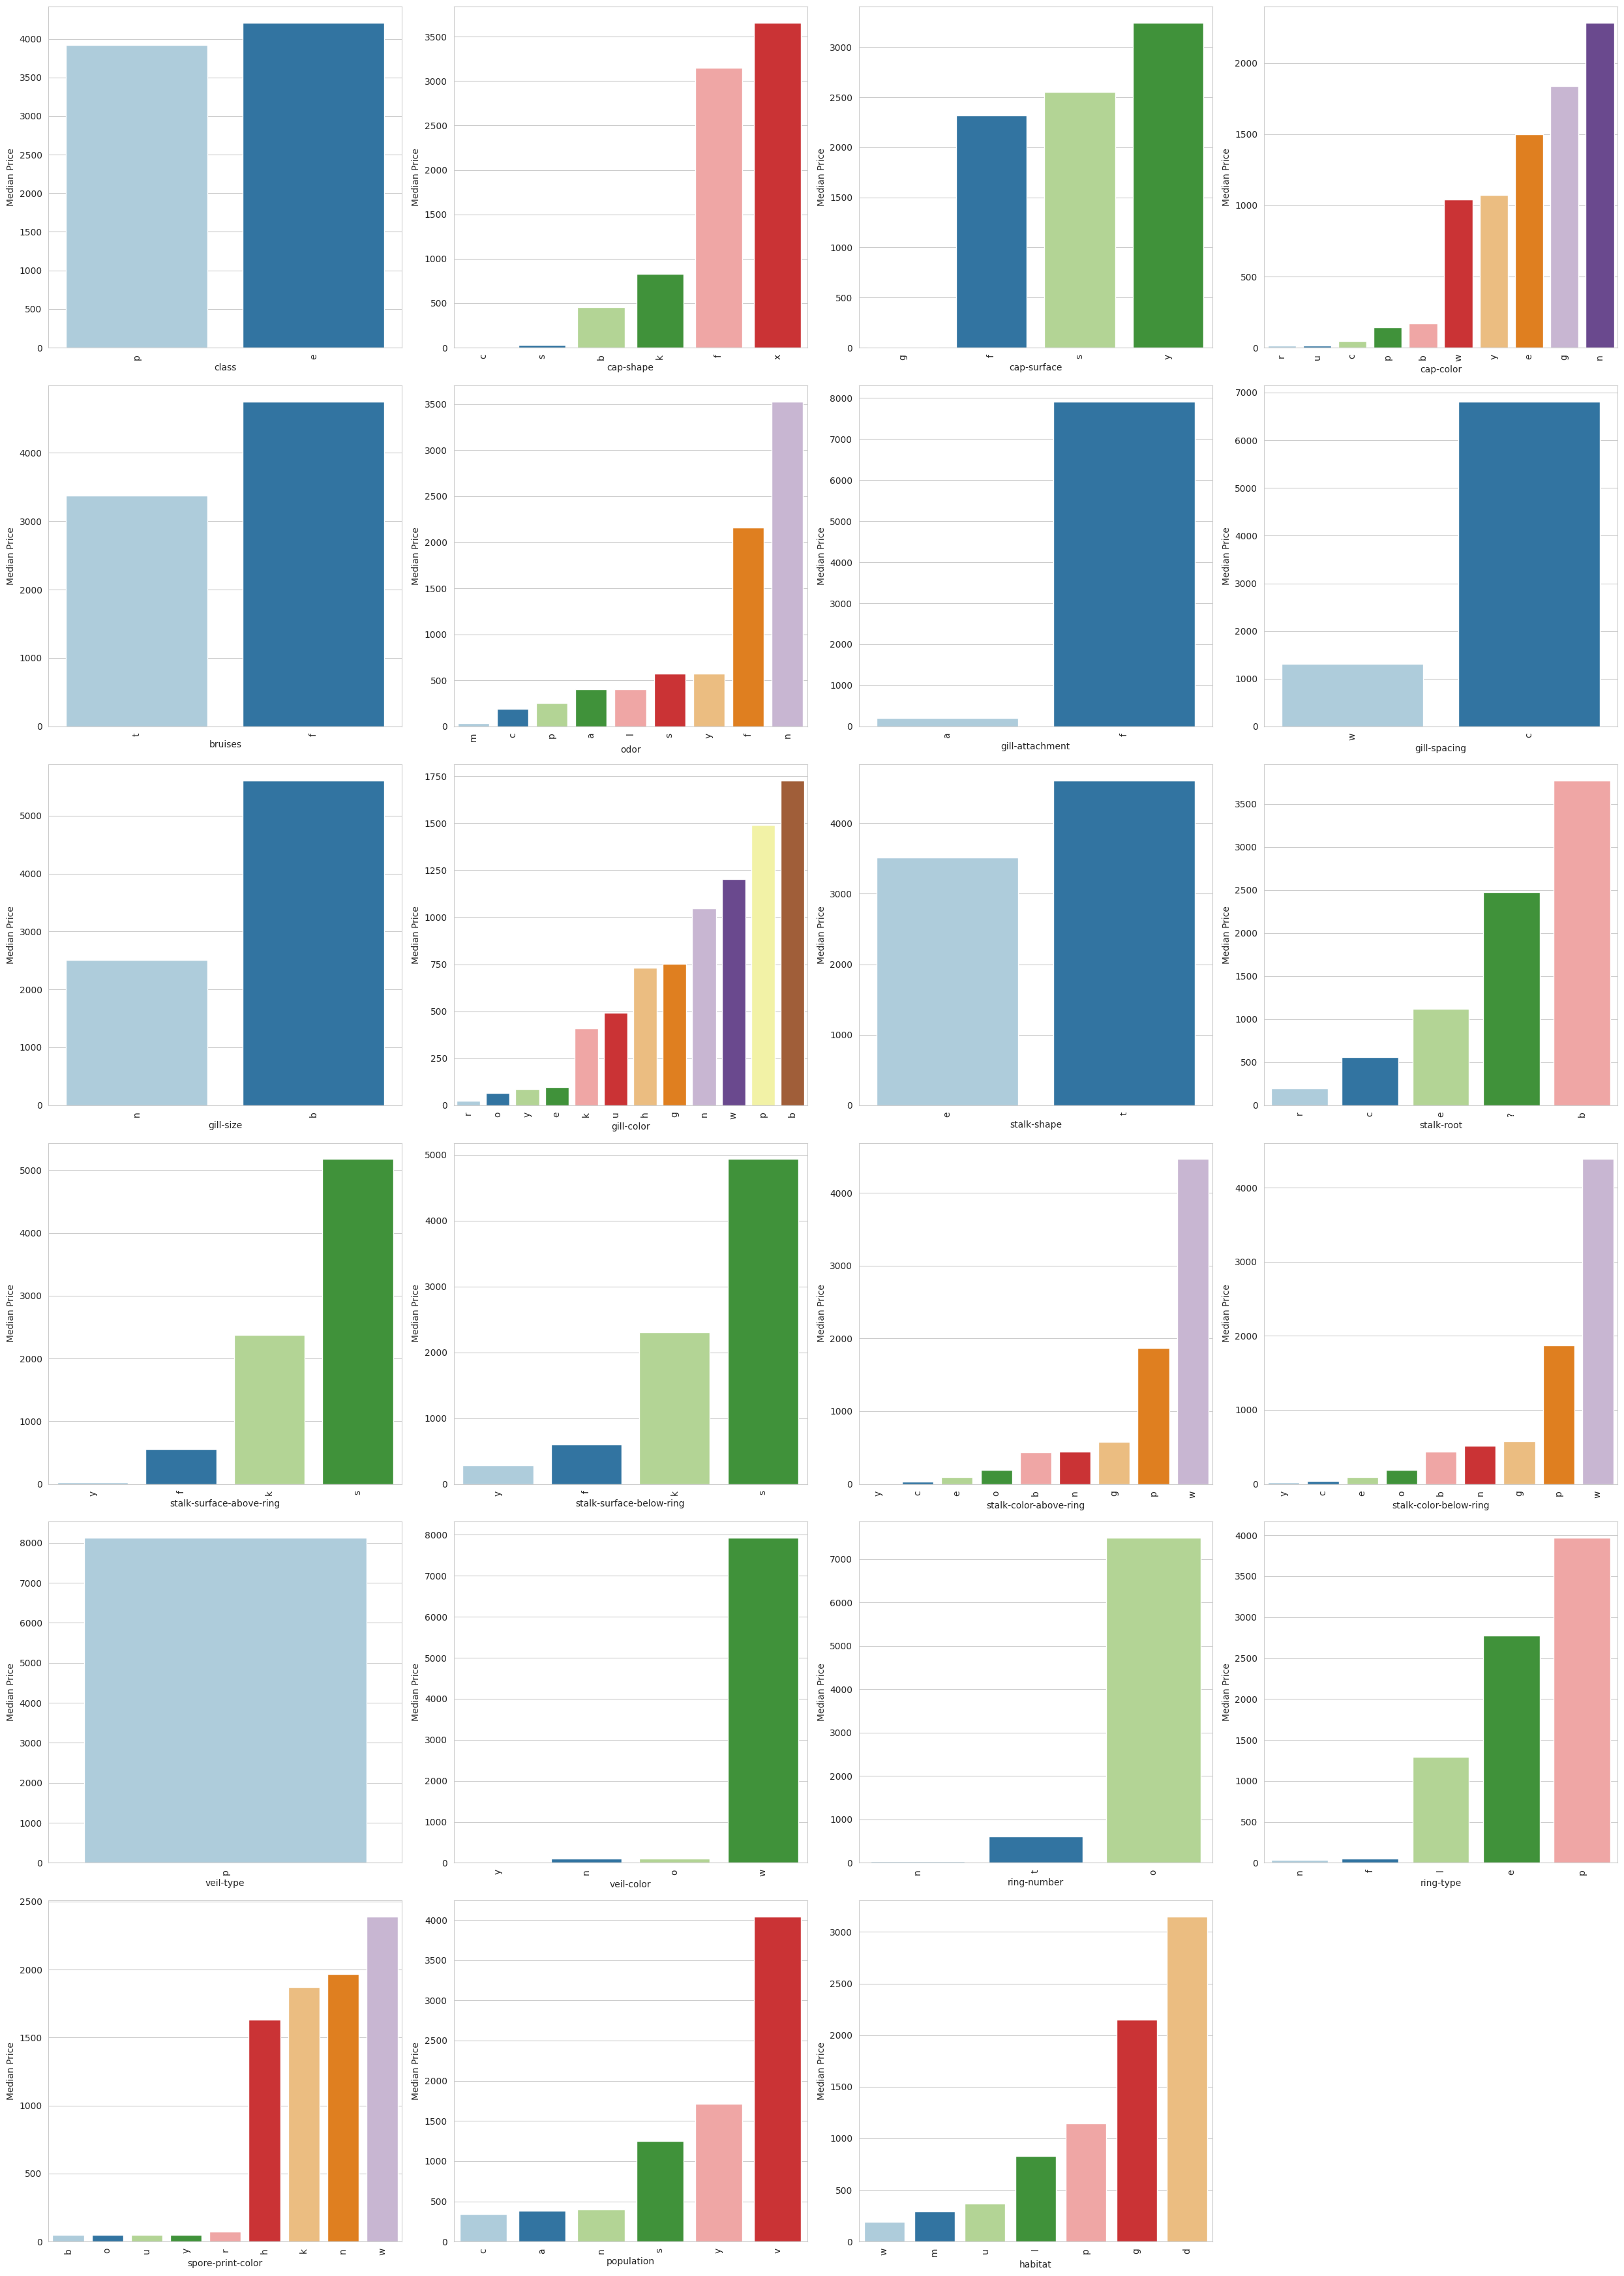

In [53]:
plt.figure(figsize=(25,35))
for i, col in enumerate(df.columns):
    sns.set_palette(sns.color_palette("Paired"))
    ax = plt.subplot(6,4,i+1)
    sns.countplot(
        x=col, data = df, ax = ax,
        order = df[col].value_counts(ascending=True).index
    )
    sns.set_style('whitegrid')
    plt.xticks(rotation=90)
    plt.ylabel("Median Price")
    plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

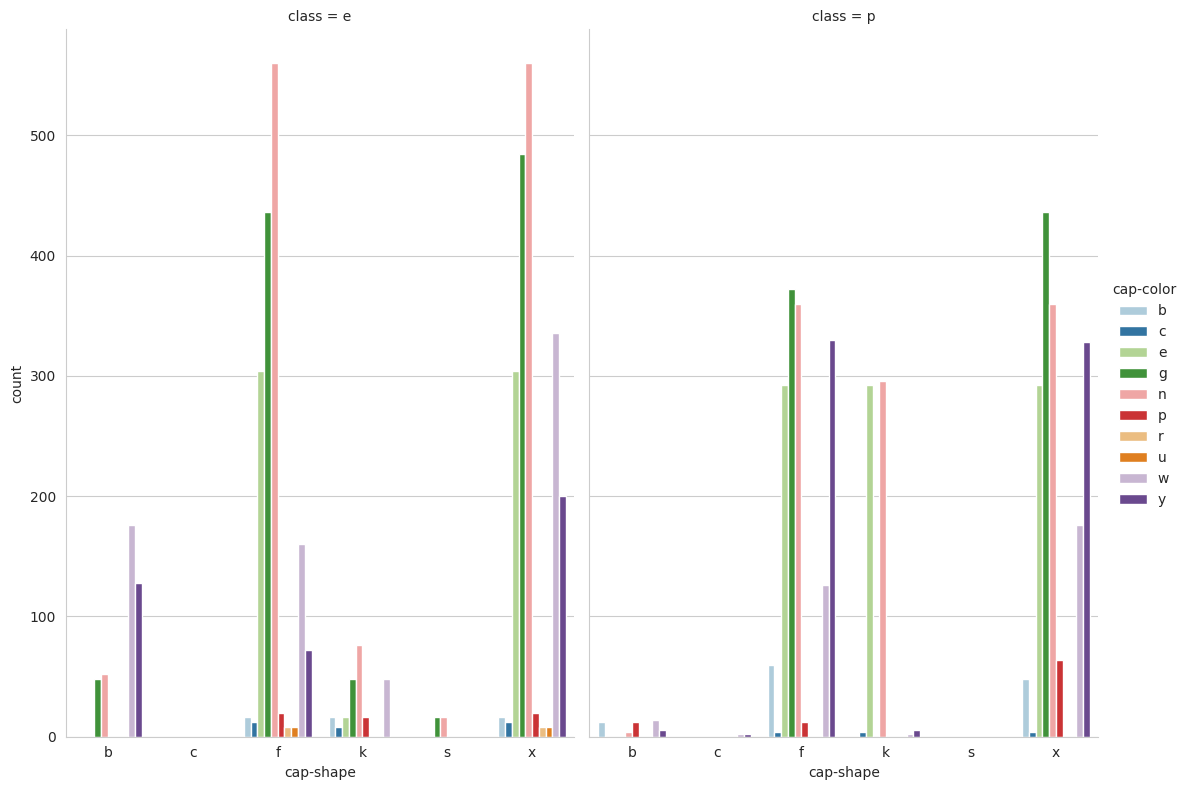

In [54]:
plt.figure(figsize = (14,10))
g = sns.catplot(x="cap-shape", hue="cap-color", col="class",
                data=df, kind="count",
                height=8, aspect=.7);

Conclusion:
White Coloured and Bell Shaped Mushrooms are highly recommended for eating
Red Coloured Knobbed Shaped Mushrooms are poisonous

<Figure size 1400x600 with 0 Axes>

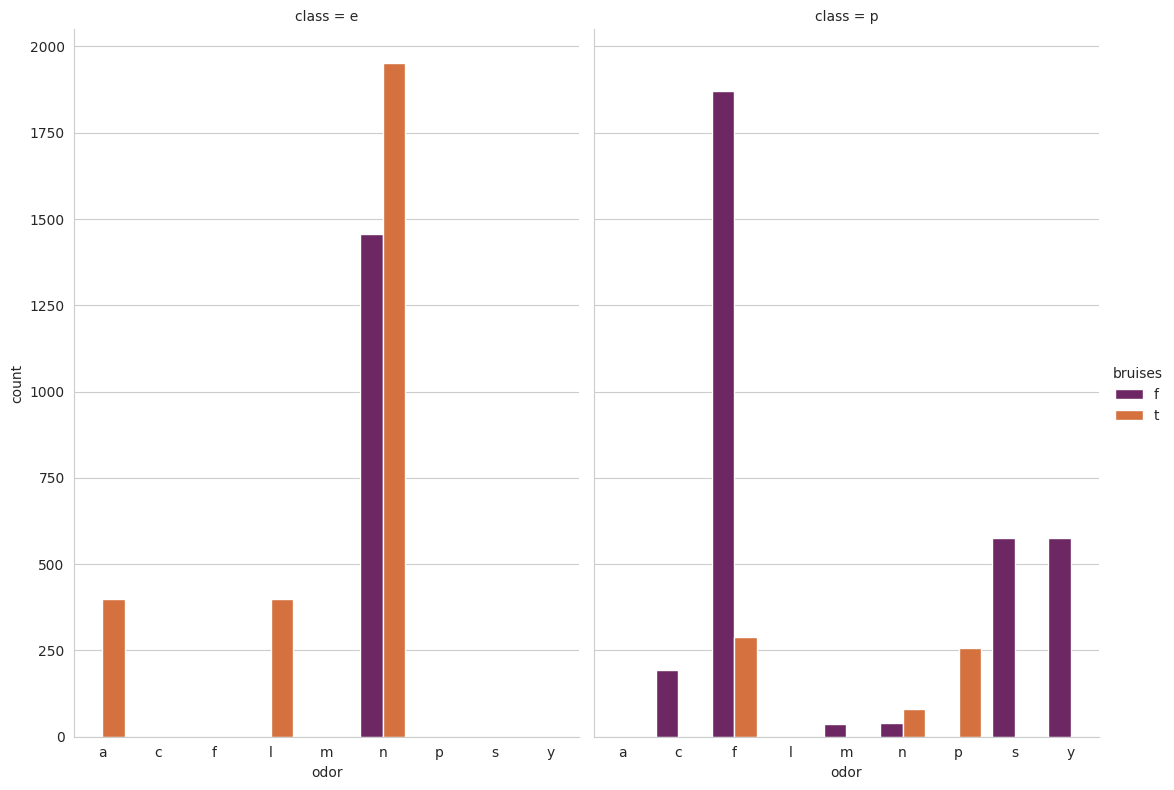

In [55]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="odor", hue="bruises", col="class",
                data=df, kind="count",
                height=8, aspect=.7 , palette = 'inferno')

Odourless and Bruised Mushrooms are highly recommended for eating
Fishy Odour with No Bruises Mushrooms are poisonous

NameError: ignored

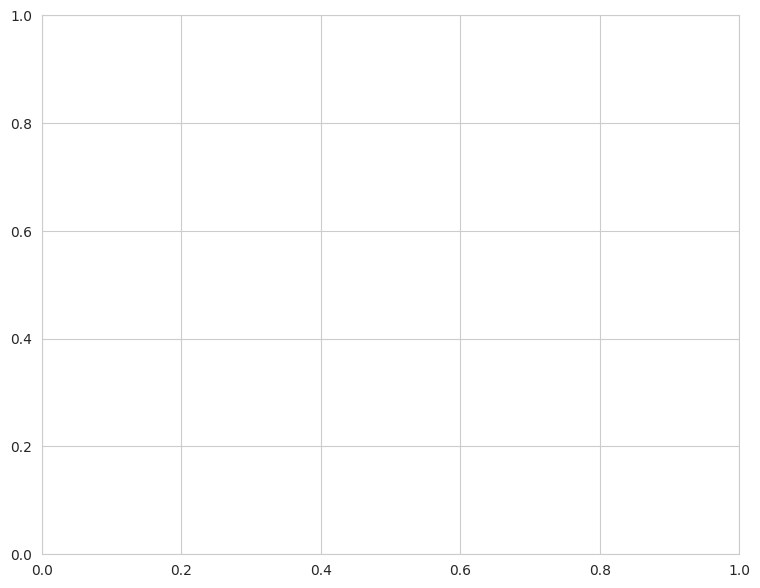

In [108]:
fig, ax = plt.subplots(figsize = (9,7))
sns.barplot(y="index", x="class", data = cramers_V_matrix[['class']].sort_values('class').reset_index(), color = "purple")
plt.title("Cramer's V Correlation to class")
plt.show()
display(cramers_V_matrix[['class']].sort_values('class'))

Observations:

Odor seems to be a strong measure as the association between odor with the target variable, class is very high.
There seems to be little association between 'stalk-shape', 'gill-attachment', 'veil-color', 'cap-surface', 'ring-number', 'cap-color', 'cap-shape' with target variable, "is-edible".

# Data Preprocessing

Since the data is categorical, we can utilize LabelEncoder to convert it into an ordinal format. This process involves assigning a distinct numeric value to every entry within the column.

Because the data is arranged categorically, we can use a LabelEncoder to convert it into a sequential order by assigning distinct numerical values to each category in the column.

To use this method, the categorical column needs to be in the 'category' data type, which isn't the default for non-numeric columns. Checking with df.info(), we've noted that our columns are currently in the 'object' data type, so we'll need to switch them to 'category' before applying this technique.

In [75]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

The mappings list creates a dictionary for each column in dataset, where each dictionary holds the mapping of encoded numerical values to their corresponding categorical values.

In [123]:
mappings = list()

encoder = LabelEncoder() #  transforms categorical data into numerical values

for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]]) #creates a dictionary (mappings_dict) that maps the numerical labels back to their original categorical values
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [78]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [80]:
 df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Veil-type column is dropped as it have constant value of "p" which does not bring any information about the target variable.

In [ ]:
df.drop(columns="veil-type", inplace = True)

from Cramer's V Correlation Matrix, we can see that certain features such as stalk-shape, gill-attachment, veil-color  add ambiguity to their ability to classify the target variable, so I also remove "stem shape" and "cap surface" from the dataset before modeling.

In [84]:
df.drop(columns = ["stalk-shape", "gill-attachment", "veil-color"], inplace = True)

In [85]:
df.shape  # returns a tuple representing the number of rows and columns in the DataFrame.

(8124, 20)

# Train-Test-Split

Train_test_split function is used to split a dataset into training and testing sets for model evaluation and training. The parameters x and y represent feature data and target labels,

In [127]:
from IPython.display import Image

Image(url='https://miro.medium.com/v2/resize:fit:640/format:webp/1*eFydLxeFcmg8Grn1eKOVXQ.png', width=400)

In [86]:
from sklearn.model_selection import train_test_split
# "class" column as numpy array.
y = df["class"].values
# All data except "class" column.
x = df.drop(["class"], axis=1).values
# Split data for train and test.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

# Classification Methods


### Logistic Regression Classification

Logistic Regression Classification is a popular method for binary classification.

In [128]:
Image(url='https://1394217531-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LvBP1svpACTB1R1x_U4%2F-Lw70vAIGPfRR1AjprLi%2F-LwAVc1EdfmPMge5dlYC%2Fimage.png?alt=media&token=d72e3231-0d64-4bb7-9e4c-20577940763d', width=500)

In [87]:
from sklearn.linear_model import LogisticRegression
## lr = LogisticRegression(solver="lbfgs")
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))

Test Accuracy: 93.72%


*It might not perform well with non-linear relationships between features and target variable. Might underperform if the data isn't easily separable by a linear boundary.*

###   KNN Classification

*K-Nearest Neighbors (KNN) classification predicts the class of a data point by identifying the majority class among its k nearest neighbors.*

In [129]:
Image(url='https://www.researchgate.net/profile/Mohammed-Badawy/publication/331424423/figure/fig1/AS:732056359297024@1551547245072/Example-on-KNN-classifier.png', width=500)

In [130]:
best_Kvalue = 0
best_score = 0

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    if score > best_score:
        best_score = score
        best_Kvalue = i

print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score * 100, 2)))

Best KNN Value: 2
Test Accuracy: 99.94%


*KNN is a good starting point for classification tasks, especially when you're exploring the nature of your data and need a quick and simple baseline model.*

### SVM Classification

Support Vector Machine (SVM) algorithm primary goal in classification is to find the optimal hyperplane that best separates data points belonging to different classes.

In [131]:
Image(url='https://3.bp.blogspot.com/-12I3KUZYAZU/WHI90_mZokI/AAAAAAAAFzg/qaaiCYvhwT41_rp0PEQjE7GFkPEtNrzkwCLcB/s1600-rw/SVM%2Bin%2BR.png', width=500)

In [89]:
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%




*SVM Classification is effective in high-dimensional spaces. However, SVMs can be computationally intensive, especially with large datasets, and selecting the right parameters can require expertise to avoid overfitting or underfitting. italicised text*

### Naive Bayes Classification

Naive Bayes classification is a machine learning algorithm commonly used for classification tasks. It's based on Bayes' theorem with an assumption of independence between features.

In [132]:
Image(url='https://insightimi.files.wordpress.com/2020/04/unnamed-1.png?w=900&h=434', width=500)

In [92]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))

Test Accuracy: 89.42%


*Naive Bayes classifiers are commonly used in text classification (spam filtering, sentiment analysis) and other tasks where the independence assumption is a reasonable approximation.*

### Decision Tree Classification

DecisionTreeClassifier uses two popular criteria, Gini impurity and entropy, to measure the quality of a split while building a decision tree. Both Gini impurity and entropy are used to evaluate how well a particular feature separates the data into classes.Both Gini impurity and entropy formulas differ in their calculations, which can result in slightly different splits.
It's a good practice to experiment with both measures and evaluate their performance using validation or cross-validation to choose the one that works better for your specific problem.

##### Gini Impurity criteria

Gini impurity measures the probability of incorrectly classifying a randomly chosen element if it was randomly labeled according to the class distribution in the dataset.

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5, 0.875, 'x[7] <= 3.5\ngini = 0.499\nsamples = 6499\nvalue = [3365, 3134]'),
 Text(0.25, 0.625, 'x[17] <= 3.5\ngini = 0.279\nsamples = 2644\nvalue = [443, 2201]'),
 Text(0.125, 0.375, 'x[16] <= 1.5\ngini = 0.214\nsamples = 476\nvalue = [418, 58]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 39\nvalue = [0, 39]'),
 Text(0.1875, 0.125, 'gini = 0.083\nsamples = 437\nvalue = [418, 19]'),
 Text(0.375, 0.375, 'x[8] <= 2.0\ngini = 0.023\nsamples = 2168\nvalue = [25, 2143]'),
 Text(0.3125, 0.125, 'gini = 0.008\nsamples = 2152\nvalue = [9, 2143]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.75, 0.625, 'x[16] <= 1.5\ngini = 0.367\nsamples = 3855\nvalue = [2922, 933]'),
 Text(0.625, 0.375, 'x[8] <= 0.5\ngini = 0.21\nsamples = 580\nvalue = [69, 511]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 69\nvalue = [69, 0]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 511\nvalue = [0, 511]'),
 Text(0.875, 0.375, 'x[6] <= 0.5\ngini = 0.225\nsamples = 3275\nvalue =

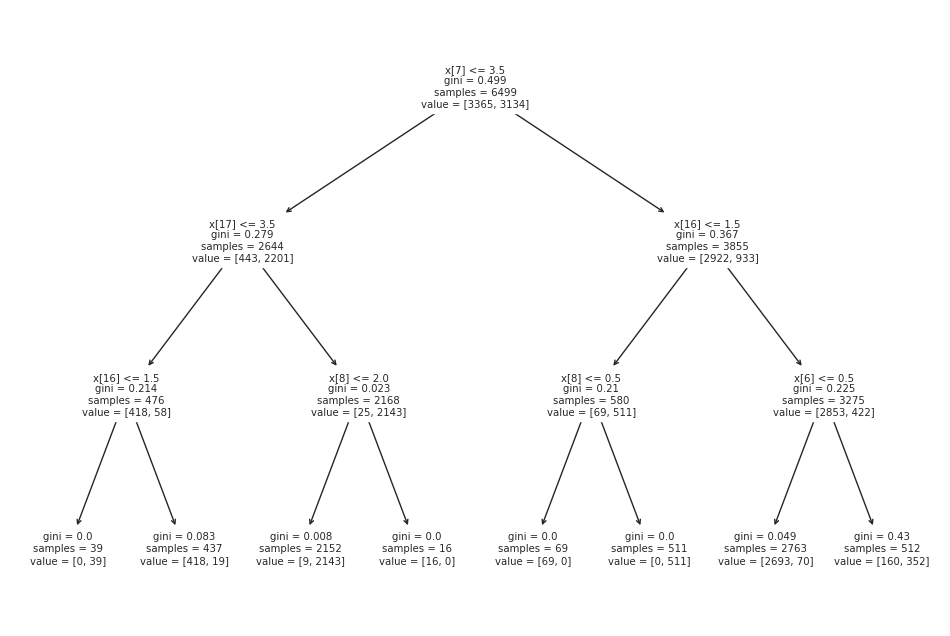

In [94]:
#Plot the tree
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(x_train, y_train))

##### Entropy criteria

Entropy criteria measure impurity or disorder within a set of labels. It quantifies the randomness or uncertainty in the data. The goal of the decision tree algorithm using entropy is to minimize entropy, thus creating nodes that contain more homogeneous classes.

In [95]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [97]:
#Predict the values
y_pred_en = clf_en.predict(x_test)
#Predict the value using X train for accuracy comparision
y_pred_train_en = clf_en.predict(x_train)

In [ ]:
# Model accuracy score with criterion entropy - the accuracy achieved by the model on a validation set
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

# Training-set accuracy score - accuracy of the model when it's trained on a specific dataset and then evaluated on the same dataset. It indicates how well the model has learned to predict the outcomes of the data it was trained on.
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

In [98]:
# Test set score represents the performance of the model on a the test set that it hasn't seen during the training phase. It gives an estimation of how well the model can generalize to new, unseen data.
print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Test set score: 0.9489


The model's accuracy score with the entropy criterion on the validation set is 95.69%.
Both the training set accuracy and training set score are 95.65%, indicating the model's ability to predict well on the data it was trained on.
The test set score is slightly higher at 95.69%, which is good and indicates that the model is performing similarly well on new, unseen data as it did on the training data.
Overall, the close alignment between the training and test scores suggests that the model isn't overfitting (where it performs well on the training data but poorly on new data). This balance is usually desirable for a robust model.

###  Confusion Matrix for Decision Tree Classification model

A confusion matrix provides a clear and detailed summary of the performance of a classification algorithm.

In [99]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[779  64]
 [ 19 763]]


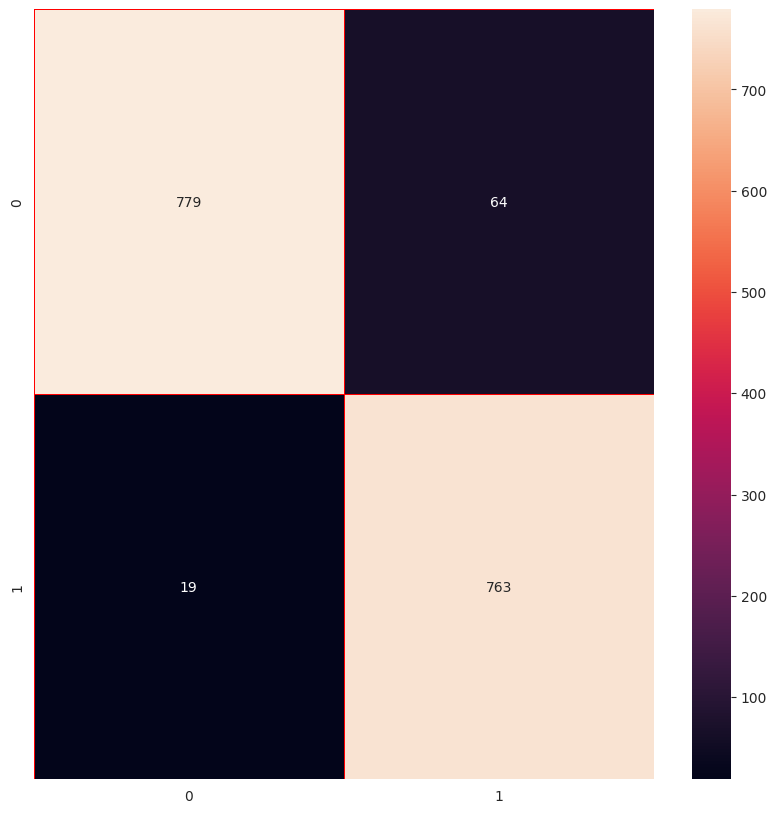

<Figure size 640x480 with 0 Axes>

In [100]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

### Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)

In [102]:
rf.fit(x_train , y_train)
rf.score(x_train , y_train) # this line computes the accuracy of the model on the test data

0.9903062009539929

In [103]:
predictions = rf.predict(x_test)
rf.score(x_test , y_test)

0.9907692307692307

In [104]:
accuracy_score(y_test , predictions)  #accuracy of the model's predictions (predictions) against the actual test labels (y_test).

0.9907692307692307

In [ ]:
df.head()

In [107]:
# x_new = np.array([["c","f","c","b"], ["b","g","g","t"], ["x","f","c","f"]])
x_new = np.array([[5,2,4,1,6,1,1,1,4,0,2,2,2,5,7,0,1,1,0]])

#Prediction of the species from the input vector
prediction = rf.predict(x_new)
print("Prediction of mushroom: {}".format(prediction))

Prediction of mushroom: [0]
